In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [332]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', 
    names=[
    'Number of times pregnant', 
    'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
    'Diastolic blood pressure mm Hg',
    'Triceps skin fold thickness (mm)',
    '2-Hour serum insulin (mu U/ml)',
    'Body mass index (weight in kg/(height in m)^2)',
    'Diabetes pedigree function',
    'Age (years)',
    'Diabetes'], header=0)

In [333]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [334]:
data.corr()
# All the correlations are fairly low which can immediately rule out 

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Diabetes
Number of times pregnant,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
Diastolic blood pressure mm Hg,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
Triceps skin fold thickness (mm),-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
2-Hour serum insulin (mu U/ml),-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
Body mass index (weight in kg/(height in m)^2),0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
Diabetes pedigree function,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age (years),0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Diabetes,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 766
Data columns (total 9 columns):
Number of times pregnant                                                    767 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    767 non-null int64
Diastolic blood pressure mm Hg                                              767 non-null int64
Triceps skin fold thickness (mm)                                            767 non-null int64
2-Hour serum insulin (mu U/ml)                                              767 non-null int64
Body mass index (weight in kg/(height in m)^2)                              767 non-null float64
Diabetes pedigree function                                                  767 non-null float64
Age (years)                                                                 767 non-null int64
Diabetes                                                                    767 non-null int64
dtypes: float64(2), int64(7)
memory u

In [336]:
data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Diabetes
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [337]:
#Dataset Description, Goals, and Hypothesis

# The dataset is trying to predict Diabetes in a population of 767 Pima Indians based on 8 already existing, measured
# features. Therefore we are categorizing into two groups, diabetic or non-diabetic. There is a quite low correlation 
# between features so KNN is may be worth a try because of this though it may be prone to overfitting.
# (This may be because zeros are not taken care of yet, but for now assuming these correlation values will stand)  
# Naive Bayes may perform well in terms of accuracy since these features have low correlation AKA independence,
# a main assumption of the Naive Bayes algorithm. I know RF will be the slowest particularly because of the low 
# correlation but I predict accuracy will be high especially when adjustin n_estimators.

In [338]:
#No nulls, but zeros in glucose concentration, BMI, triceps skin fold are not possible AKA they are legitimate errors. 
# Zero in times pregnant would be fine to assume that the woman never got pregnant. 
# I know my code is terrible but bear with me --- I will come back to this 
#data[data['Plasma glucose concentration a 2 hours in an oral glucose tolerance test']==0] = np.nan
#data[data['Diastolic blood pressure mm Hg']==0] = np.nan
#data[data['Triceps skin fold thickness (mm)']==0] = np.nan
#data[data['Body mass index (weight in kg/(height in m)^2)']==0] = np.nan

In [339]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [340]:
diab_labels = data['Diabetes']
diab_X = data.drop('Diabetes', axis=1)

In [341]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diab_X, diab_labels, 
                                                    test_size=0.2, random_state=0)

In [342]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [343]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [344]:
pd.DataFrame(X_train_std, columns=X_train.columns).head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure mm Hg,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,0.066497,1.929874,-3.488341,-1.308329,-0.690781,-0.470579,-0.766406,0.239252
1,0.066497,-0.694877,0.355525,-0.351053,-0.241970,-1.135186,-0.734597,-1.048004
2,1.554177,0.086299,0.052062,0.797678,2.846904,0.424084,-0.563987,0.067618
3,-0.528576,-1.038594,0.254371,-0.095780,-0.224369,-0.393894,-0.717247,-0.962187
4,0.661569,1.023710,0.456680,1.308225,0.541249,1.791641,0.271717,-0.533102


In [345]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [346]:
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(613, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [347]:
clf.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

In [348]:
best_knn = clf.best_estimator_

In [349]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

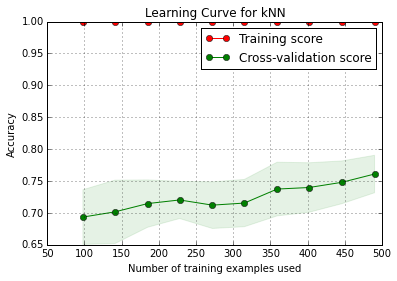

In [350]:
plot_learning_curve(best_knn, 'Learning Curve for kNN', X_train_std, y_train, cv=cv, train_sizes=np.linspace(.2,1.0,10), n_jobs=1);

In [351]:
y_test.value_counts().head(1) / len(y_test)

0    0.655844
Name: Diabetes, dtype: float64

In [352]:
best_knn.score(X_test_std, y_test)

0.77272727272727271

In [353]:
%timeit best_knn.predict(X_test_std)

100 loops, best of 3: 2.96 ms per loop


In [354]:
#LOGISTIC REGRESSION

In [355]:
feature_cols = ['Number of times pregnant', 
    'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
    'Diastolic blood pressure mm Hg',
    'Triceps skin fold thickness (mm)',
    '2-Hour serum insulin (mu U/ml)',
    'Body mass index (weight in kg/(height in m)^2)',
    'Diabetes pedigree function',
    'Age (years)']
X = data[feature_cols]
y = data['Diabetes']

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [357]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'auto']}
logreg = LogisticRegression()           
clf = GridSearchCV(logreg, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(575, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [358]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Number of times pregnant', 0.38596784456426436),
 ('Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
  1.0286213826886184),
 ('Diastolic blood pressure mm Hg', -0.25543647862738939),
 ('Triceps skin fold thickness (mm)', -0.10629858778060072),
 ('2-Hour serum insulin (mu U/ml)', -0.066688668954090022),
 ('Body mass index (weight in kg/(height in m)^2)', 0.78459158941755069),
 ('Diabetes pedigree function', 0.36816807573450505),
 ('Age (years)', 0.16647651886995155)]

In [359]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test_std)

In [360]:
# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.765625


In [361]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': None}

In [362]:
clf.best_score_

0.7817391304347826

In [363]:
best_log = clf.best_estimator_

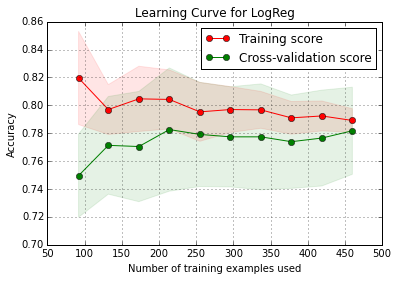

In [364]:
%matplotlib inline
plot_learning_curve(best_log, 'Learning Curve for LogReg', X_train_std, y_train, cv=cv);

In [365]:
best_log.score(X_test_std, y_test)

0.765625

In [366]:
%timeit best_log.predict(X_test_std)

The slowest run took 5.92 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 31.9 µs per loop


In [367]:
y_test.value_counts().head(1) / len(y_test)

0    0.666667
Name: Diabetes, dtype: float64

In [368]:
# This model predicts ~10% more accurately than if we simply took the majority of the "successful" event (diabetes +)
# This is decent performance from an accuracy standpoint

In [369]:
# NAIVE BAYES 

In [370]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

In [371]:
# Naive Bayes won't work well in this instance as it is not ok to assume that the features 
# are all independent of each other
# Having issues implementing NB due to Count Vectorizer-- Want to use pd.categorical instead but not sure if it would
# suffice

In [372]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [373]:
model = RandomForestClassifier(n_estimators=200)

# Continue to add features to X
#     Build dummy features, include quantitative features, or add text features
X = data[['Number of times pregnant', 
    'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
    'Diastolic blood pressure mm Hg',
    'Triceps skin fold thickness (mm)',
    '2-Hour serum insulin (mu U/ml)',
    'Body mass index (weight in kg/(height in m)^2)',
    'Diabetes pedigree function',
    'Age (years)',
    'Diabetes']].dropna()

y = X['Diabetes']

X.drop('Diabetes', axis=1, inplace=True)


In [374]:
scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

CV accuracy [ 0.73828125  0.75390625  0.79607843], Average accuracy 0.762755310458


In [375]:
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,Plasma glucose concentration a 2 hours in an o...,0.264130
5,Body mass index (weight in kg/(height in m)^2),0.162319
7,Age (years),0.138791
6,Diabetes pedigree function,0.125592
2,Diastolic blood pressure mm Hg,0.089088


In [376]:
%timeit model.predict(X_test_std)

100 loops, best of 3: 8.97 ms per loop


In [377]:
# I feel like I'm missing a lot of insight here since I didn't drop the zeroes. However based on what I have, there was
# similar performance for LOGREG, KNN, and RF all performing around 10% more accurately on the 
# test set than simply finding the percentage of Diabetes positive test subjects. In terms of timing, LOGREG was fastest
# at some microseconds, KNN in second at 2 milliseconds, and a distant 3rd was Random Forest at 9 milliseconds. RF did
# have a best accuracy of 80% although the average fell close to the average performance of the others.
# KNN overfit the training data by memorizing and therefore may not be a good predictor for future data though it
# performed decently on this test set. 
